# Applied Data Science and Machine Intelligence
## A program by IITM and TalentSprint
### Assignment 7: Linear Classification

## Learning Objectives

At the end of the experiment, you will be able to

* understand and code a logistic regression algorithm.
* understand the basics of Linear Discriminant Analysis (LDA).
* use toy datasets for binary classification
* use the standard MNIST dataset for multiclass classification.


### Linear Classification

Linear classification aims at dividing the feature space into a collection of regions labeled according to the values the target can take, where the decision boundaries between those regions are linear: they are lines in 2D, planes in 3D, and hyperplanes with more features.

<br>
<center>

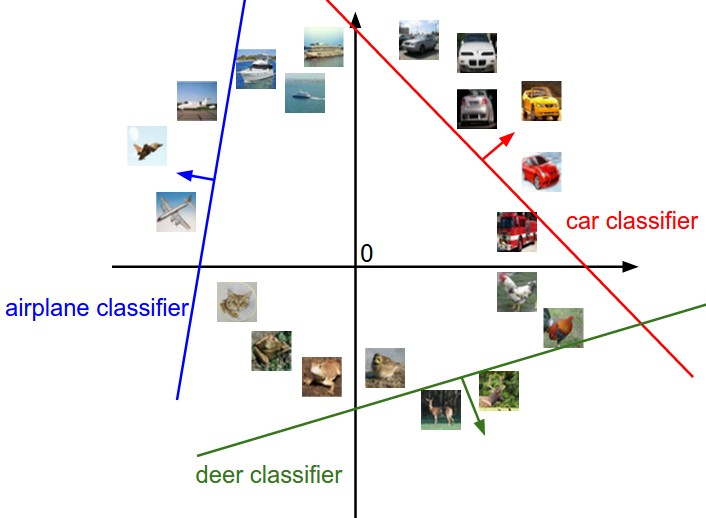

The above image illustrates an example of a linear classifier. There can be multiple types of linear classifiers each with its own properties and usefulness. In this assignment, we will cover some of them and provide you with code snippets that can be used to train each of them. We will use ``scikit-learn`` library for training the models. We will use one of the most popular dataset called the MNIST dataset for performing all the experiments.

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M2_Assignment_07_LinearClassification_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://adsmi.iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



#### Importing necessary packages for this assignment.
Lets first import the necessary packages required for this notebook.

In [ ]:
# Importing Standard Libraries for data handling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# A library to measure run-time/training-time
import time

# Import the mnist and fashion mnist dataset
from keras.datasets import mnist
from keras.datasets import fashion_mnist

# Import a toy dataset from sklearn
from sklearn.datasets import make_blobs

# Saving sklearn models
import pickle

# Importing sklearn Libraries for the machine learning models
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")                       

### Binary Classification

In this type of classification, the dataset consists of two classes. Thus, the labels are often defined as $0$ and $1$, or $-1$ and $1$. The input data can be images, text, points etc. As the name suggests, linear classifiers classify data into labels based on a linear combination of input features. Therefore, these classifiers separate data using a line or plane or a hyperplane (a plane in more than 2 dimensions). They can only be used to classify data that is linearly separable. We first use a toy dataset to show the effects of linear classification.

In [ ]:
# Creating a sample dataset using blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

The dataset is created. Let us now plot the dataset. We use the labels present in the $y$ array to color code the samples. Samples of two different classes are shown in two distinct colors.

In [ ]:
# Plotting the dataset
# Using the labels to color code the samples
plt.scatter(X[:,0],X[:,1], c=y);

We also split the dataset into train and test set. This will be important to measure the performance of our network. We use a random split. We also define a test set size of $10\%$ of the total dataset.

In [ ]:
# Creating a train and test split for the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

We now plot the train set as well as the test set.

In [ ]:
# Plotting the train set that we just created from the dataset
# Using the labels to color code the samples
plt.scatter(X_train[:,0],X_train[:,1], c=y_train);

The above is the plot of the train set. We also plot our test set.

In [ ]:
# Plotting the test set of the dataset
# Using the labels to color code the samples
plt.scatter(X_test[:,0], X_test[:,1], c=y_test);

We now use logistic regression classifier on this dataset to classify the two classes. We will also plot the classification boundary generated by the classifier.

### Logistic Regression
Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, more popularly called the sigmoid function was to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. 

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$\frac{1}{ (1 + e^{-value})}$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. Below is a plot of the numbers between $-5$ and $5$ transformed into the range $0$ and $1$ using the logistic function.



In [ ]:
# Defining the sigmoid function. This will be used ONLY for plotting.
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

In [ ]:
# The inputs from -5 to 5.
x = np.arange(-5., 5., 0.1)
sig = sigmoid(x)

plt.plot(x, sig)
plt.show()

Before we use a standard logistic regression function to train on the synthetic dataset, lets check the input shapes. The input shapes to the logistic regression traiining function is of the shape $(N, D)$. Here $N$ is the number of samples (in our case this is set to $900$ during training time). We have also $D=2$. The labels will be of the shape $(N,)$.

In [ ]:
# Printing the shapes of the train data
print ("The shape of the input data: ")
print (X_train.shape)

print ("The shape of the labels of the training data: ")
print (y_train.shape)

Let us now train a logistic regression model for the generated dataset.

In [ ]:
# Creating a logistic model. We keep all the parameters as default right now.
logisticregression_model = linear_model.LogisticRegression()

# Train the  logistic regression model.
logisticregression_model.fit(X_train, y_train)

# Calculate the accuracy of the model that just got trained.
acc = logisticregression_model.score(X_test, y_test)

# Print the accuracy that is given in terms of a probability ranging from 0 to 1.
print ("The accuracy of the logistic regression model on the synthetic dataset is: {}%".format(acc*100))

Till now we have only seen the effect of logisic regression on a sample dataset. Let us now try to train the same algorithm on a more complex dataset. Also, note that the dataset will have multiple classes. We use the MNIST dataset for this purpose.

### MNIST Dataset

MNIST dataset consists of over $60,000$ train images and $10,000$ test images from 10 digit classes ($0 - 9$) and is available in several libraries. We load the data below and will use it for training multiple linear classifiers. 

In [ ]:
# Loading the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print ("-----------Stats-----------")


# Printing the shapes of the data for checking the numbers in train and test split.
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

print ("-----------Plots-----------")

# Plotting two images randomly and also printing their labels
for i in range(2):
  j = np.random.randint(0, 60000)  
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[j], cmap=plt.get_cmap('gray'))
  print ("Label of the below image: ", train_y[j])
  plt.show()

The above mention curve is used for predicting the classes of the input. We now check out a code snippet to check logistic regression on the MNIST dataset!

In [ ]:
# Creating a logistic model. We keep all the parameters as default right now.
logisticregression_model = linear_model.LogisticRegression()

# The model takes in (Input, Labels) as input in the fit function.
# The model requires 2D data as input. It requires data which is shaped as (N, D). In our case, N=60,000 and D = 28*28 = 784
# The labels will be shaped as (N,), this is what we have so no change done to the labels (stored in train_y)
train_X_reshaped = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]*train_X.shape[2]))

# Train the  logistic regression model.
logisticregression_model.fit(train_X_reshaped, train_y)

# Prepare test data for the logistic regression model.
# We reshape the data in the same way we do during training. 
test_X_reshaped = np.reshape(test_X, (test_X.shape[0], test_X.shape[1]*test_X.shape[2]))

# Calculate the accuracy of the model that just got trained.
acc = logisticregression_model.score(test_X_reshaped, test_y)

# Print the accuracy that is given in terms of a probability ranging from 0 to 1.
print ("The accuracy of the logistic regression trained model is: {}%".format(acc*100))

We have trained a model for logistic regression. How do we save that in the disk? Let us check out a code snippet for doing the same. We first save the model. We then reload it and check the accuracy again.

In [ ]:
# Saving the logistic regression model in the disk.
# Please go to the number four option in your left hand bar with a folder icon. Click on it to access the local space in the collab.
# Your model will be saved there
filename = 'lr_model.sav'
pickle.dump(logisticregression_model, open(filename, 'wb'))

# Loading the same model to show the acc remains the save.
loaded_logisticregression = pickle.load(open(filename, 'rb'))
# Calculate the accuracy of the model that just got trained.
acc_loaded = loaded_logisticregression.score(test_X_reshaped, test_y)

# Print the accuracy that is given in terms of a probability ranging from 0 to 1.
print ("The accuracy of the loaded model is: {}%".format(acc_loaded*100))

The accuracy of the logistic regression model is fairly high. Let us predict and plot random images from the test set and check the predictions. You can keep running the block to change the random images (in every run new images are selected).

In [ ]:
# Plotting two images randomly and also printing their labels. The model used will be the trained logistic regression models.
for i in range(2):
  j = np.random.randint(0, 10000)  
  plt.subplot(330 + 1 + i)
  plt.imshow(test_X[j], cmap=plt.get_cmap('gray'))
  print ("Ground-truth label of the below image: ", test_y[j])
  plt.show()

  # Prediction function
  label_predict = logisticregression_model.predict([test_X[j].flatten()])
  print ("Predicted label of the above image: ", label_predict[0])
  print ("------------------------------------------------")

## Ungraded Excercise

Train a  a logistic regression based classifier  on the FASHION MNIST dataset and report the results. Report which has the maximum accuracy in this case. Also, plot the dataset (input to the model) and the predictions like shown above. We provide the code to import the dataset from the web.

In [ ]:
# Loading the fashion mnist dataset for the graded excercise. Please use this code snippet to load the dataset
(train_images_fm, train_labels_fm), (test_images_fm, test_labels_fm) = fashion_mnist.load_data()
print ("The FASHION MNIST dataset is loaded and ready!")

### Linear Discriminant Analysis

Linear Discriminant Analysis is another linear classification algorithm. The algorithm develops a probabilistic model for each class based on the specific distribution of observations for each input variable. A new example is then classified by calculating the conditional probability of the example belonging to each distribution and selecting the distribution with the highest probability. The class of the highest probable distribution is considered to be the prediction from the algorithm. LDA is often also used for dimensionality reduction. The goal of an LDA is often to project a feature space (a dataset $n$-dimensional samples) onto a smaller subspace $k$ (where $k \leq n−1$) while maintaining the class-discriminatory information. Please note that $k$ will always be $\leq$ the number of classes. This allows users to first reduce the dimension of the input using LDA (say we take 784 of MNIST to 5) and then train other classification networks. We take a look at a sample code on how to use LDA in python, calculate accuracy achieved by a LDA classifier and also use LDA to reduce dimension and then train a logistic regression classifier.



In [ ]:
# Defining the LDA model in sklearn
# n_components will be marking the number of components we want to project our input to. Here n_components = k = 5. 
# n_components cannot be greater than the number of classes that is 10.
lda = LinearDiscriminantAnalysis(n_components=5)

# The model takes in (Input, Labels) as input in the fit function.
# The model requires 2D data as input. It requires data which is shaped as (N, D). In our case, N=60,000 and D = 28*28 = 784
# The labels will be shaped as (N,), this is what we have so no change done to the labels (stored in train_y)
# Please note that the input has 784 dimensions originally.
train_X_reshaped = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]*train_X.shape[2]))

# Training the lda model
lda.fit(train_X_reshaped, train_y)

# Prepare test data for the logistic regression model.
# We reshape the data in the same way we do during training. 
test_X_reshaped = np.reshape(test_X, (test_X.shape[0], test_X.shape[1]*test_X.shape[2]))

# Testing the accuracy of the LDA model first.
acc = lda.score(test_X_reshaped, test_y)

print ("Accuracy of a pure LDA classifier: ", acc*100, "%")

#### LDA classfier

Let us use the trained LDA classfier to first dimensionally reduce both the train and test set of MNIST dataset.

We will then train a logistic regression on the dimensionally reduced data and check the benefits and drawbacks.

In [ ]:
print ("Shape of the training data originally: ", train_X_reshaped.shape)
train_X_reshaped_dr = lda.transform(train_X_reshaped)
print ("Shape of the training data after dimensionality reduction: ", train_X_reshaped_dr.shape)
print ("Shape of the test data originally: ", test_X_reshaped.shape)
test_X_reshaped_dr = lda.transform(test_X_reshaped)
print ("Shape of the training data after dimensionality reduction: ", test_X_reshaped_dr.shape)

We will train a logistic regression on the original train data and dimensionally reduced train data and test both the speed of training as well as the accuracy.


In [ ]:
logisticregression_model_original_data = linear_model.LogisticRegression()
start = time.time()
logisticregression_model_original_data.fit(train_X_reshaped, train_y)
end = time.time()
acc_original = logisticregression_model_original_data.score(test_X_reshaped, test_y)
print ("The accuracy of the trained Logistic Regression model on original data is: {}%".format(acc_original*100))
print ("Time taken for training the Logistic Regression model on original data is: {} sec".format((end-start)/1000))

We will train a logistic regression on the dimensionally reduced train data now.

In [ ]:
logisticregression_model_dr_data = linear_model.LogisticRegression()
start = time.time()
logisticregression_model_dr_data.fit(train_X_reshaped_dr, train_y)
end = time.time()
acc_dr = logisticregression_model_dr_data.score(test_X_reshaped_dr, test_y)
print ("The accuracy of the trained Logistic Regression model on dimensionally reduced data is: {}%".format(acc_dr*100))
print ("Time taken for training the Logistic Regression model on dimensionally reduced data is: {} sec".format((end-start)/1000))

As seen from the above experiment, it is possible to train models on the dimensionally reduced data with some accuracy drop but with huge gains on the time taken for training such a model. 

## Ungraded Exercise
1. Use LDA to dimensionally reduce the dataset and train logistic regression based classifier both on MNIST and Fashion MNIST datasets.
2. Use different number of components in LDA to check how it affects the final accuracies of classifiers trained on the dimensionally reduced data.

### Please answer the questions below to complete the experiment:




In [ ]:
#@title The range of Sigmoid non linearity is? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "-1 to 1", "0 to 1", "1 to 2"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")